Do everything from insectsounds.ipynb but with the frequencies limited to the range f_min-f_max and/or freqencies with amplitudes aboth a threshold a_thesh

In [45]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft

# ML
from sklearn.preprocessing import LabelEncoder
## preprocssing
from sklearn.model_selection import train_test_split

## Models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
data = loadarff('C:/Users/kelvi/Documents/Studium/Master/6.Semester/Time_Series_Prediction/InsectSound/InsectSound/InsectSound.arff')
df = pd.DataFrame(data[0])

#Set variables to the length of the timeseries and the frequency of the data
T_timeseries=0.1 #second
f_timeseries=6000 #Hz
Time=np.arange(0,T_timeseries,1/f_timeseries) #time in seconds

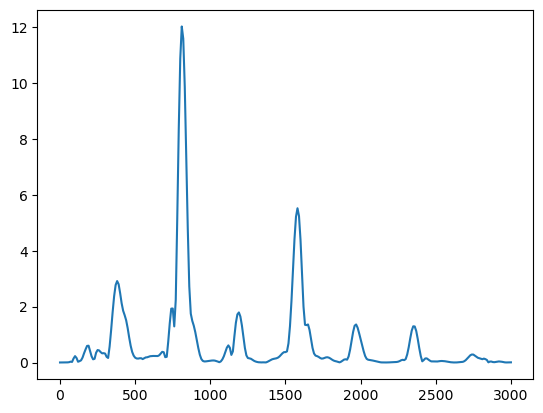

In [46]:
target = df["target"]
df_fft = pd.DataFrame(abs(rfft(df.drop(columns = "target"))))
frequencies=np.fft.rfftfreq(df.iloc[0, :-1].size, d=1/f_timeseries)

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['target'])

plt.plot(frequencies, df_fft.iloc[0,:])

## Frequency Range

(50000, 191)


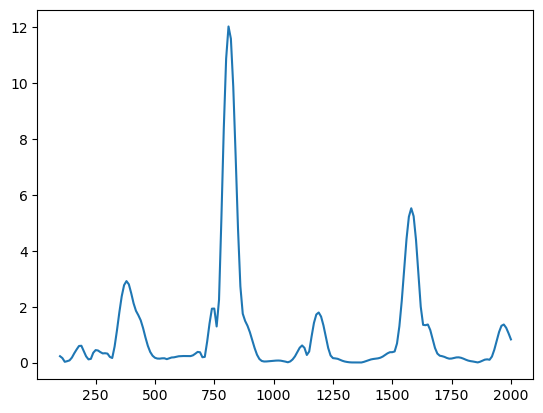

In [43]:
f_min=100
f_max=2000

mask = np.logical_or(frequencies < f_min, frequencies > f_max)

truncate_frequencies=np.ma.masked_where(mask , frequencies)
truncate_frequencies=truncate_frequencies.compressed()

maskedSpectrum=np.ma.MaskedArray(np.array(df_fft), mask=np.ones_like(df_fft)*np.logical_or(frequencies<f_min, frequencies>f_max))

#plt.plot(frequencies, truncateSpectrum[0,:])

valid_columns = ~maskedSpectrum.mask.all(axis=0)
truncateSpectrum = maskedSpectrum[:, valid_columns]


print(result_df_fft.shape)

plt.plot(truncate_frequencies, truncateSpectrum[0,:])


### Gaussian Naive Bayes

0.57604


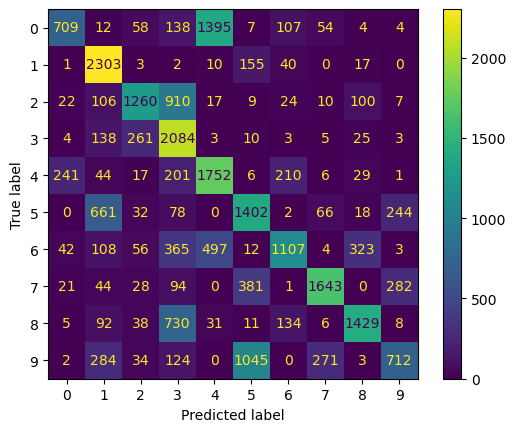

In [52]:
X, y = truncateSpectrum, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Support Vector Classifier

0.72268


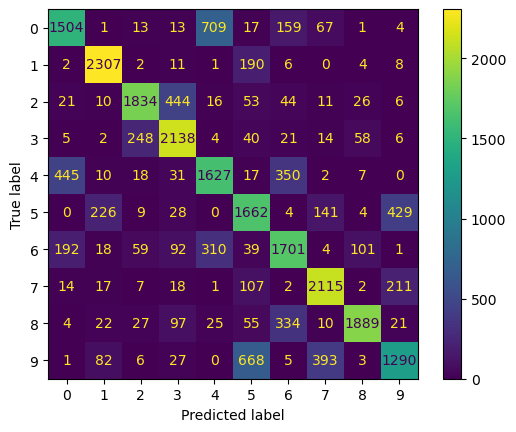

In [55]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
print(accuracy_score(y_test, predictions))

### Random Forest Classifier

0.72732


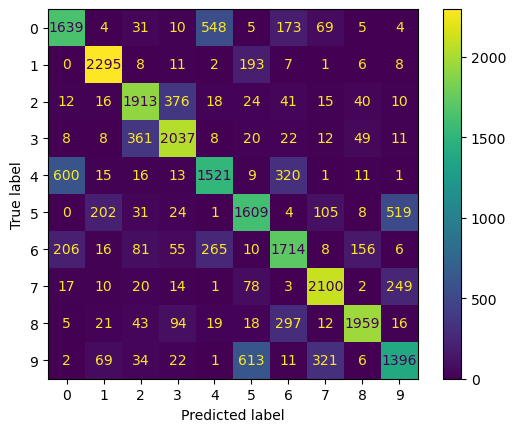

In [50]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
print(accuracy_score(y_test, predictions))

### kNN-Classifier

0.68244

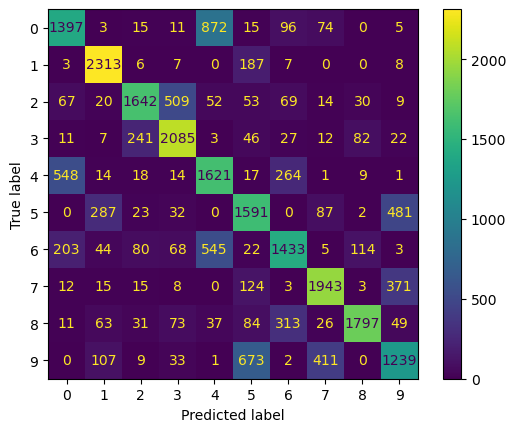

In [54]:
clf = KNeighborsClassifier(n_neighbors = 50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
accuracy_score(y_test, predictions)

## Amplitude Threshold

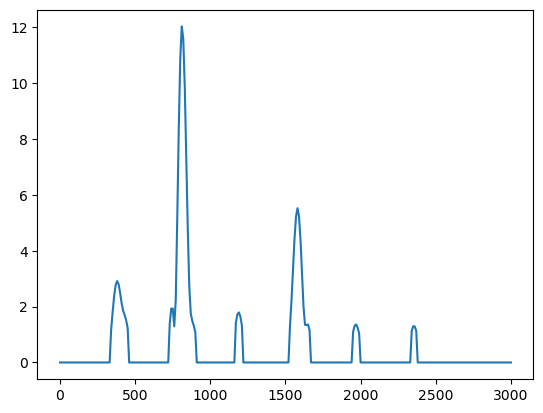

In [79]:
a_threshold= 1

filtered_fft=np.empty_like(np.array(df_fft))
filtered_fft[:]=np.array(df_fft)

for i in range(len(filtered_fft)):
        for j in range(len(filtered_fft[i])):
            if filtered_fft[i][j] < a_threshold:
                filtered_fft[i][j] = 0
                
plt.plot(frequencies, filtered_fft[0,:])

### Gaussian Naive Bayes

0.46048


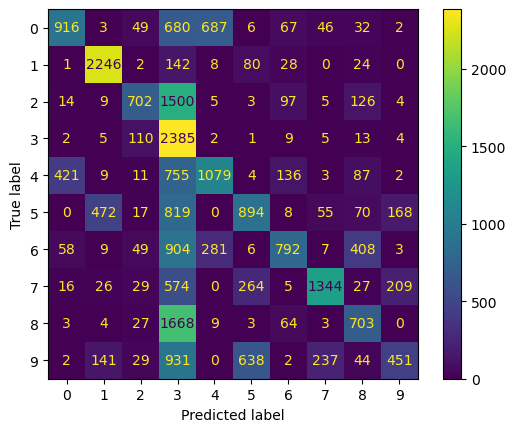

In [80]:
X, y = filtered_fft, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Support Vector Classifier

0.71516


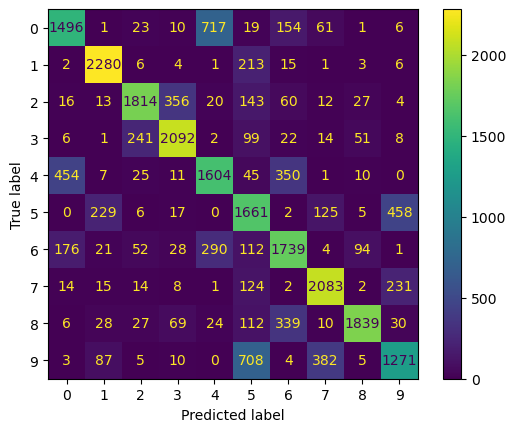

In [81]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
print(accuracy_score(y_test, predictions))

### Random Forest Classifier

0.71628


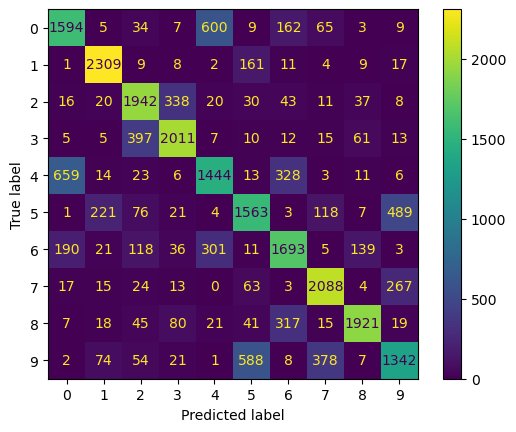

In [82]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
print(accuracy_score(y_test, predictions))

### kNN-Classifier

0.67796

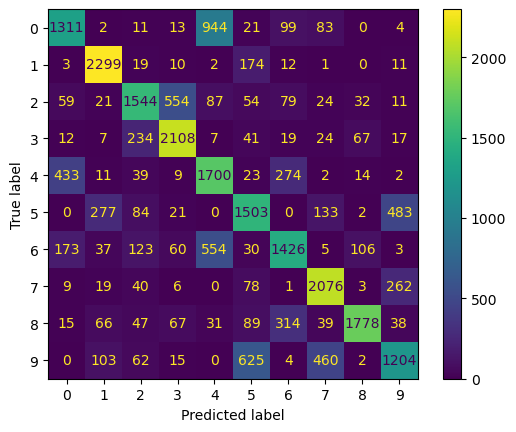

In [83]:
clf = KNeighborsClassifier(n_neighbors = 50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
accuracy_score(y_test, predictions)

## Both

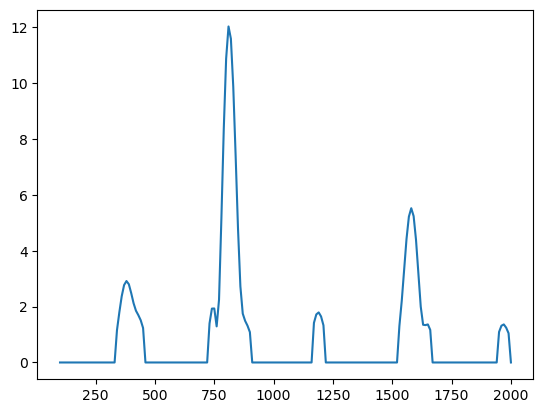

In [66]:
truncateSpectrum
truncate_filtered_fft=np.empty_like(np.array(truncateSpectrum))
truncate_filtered_fft[:]=np.array(truncateSpectrum)

for i in range(len(truncate_filtered_fft)):
        for j in range(len(truncate_filtered_fft[i])):
            if truncate_filtered_fft[i][j] < a_threshold:
                truncate_filtered_fft[i][j] = 0
                
plt.plot(truncate_frequencies, truncate_filtered_fft[0,:])

### Gaussian Naive Bayes

0.5452


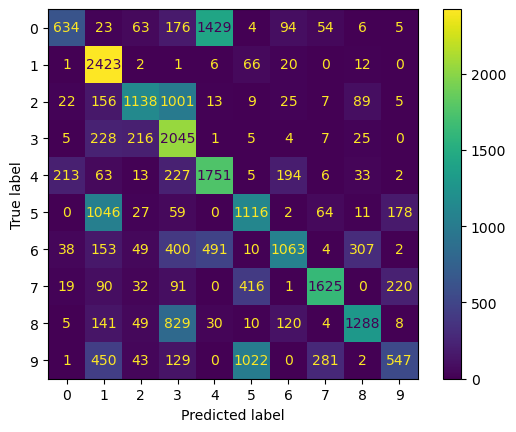

In [68]:
X, y = truncate_filtered_fft, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Support Vector Classifier

0.70732


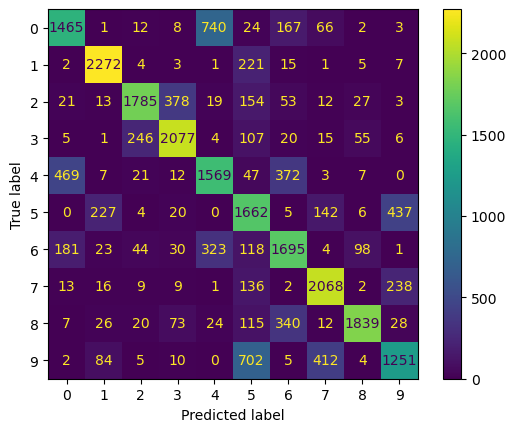

In [69]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
print(accuracy_score(y_test, predictions))

### Random Forest Classifier

0.70944


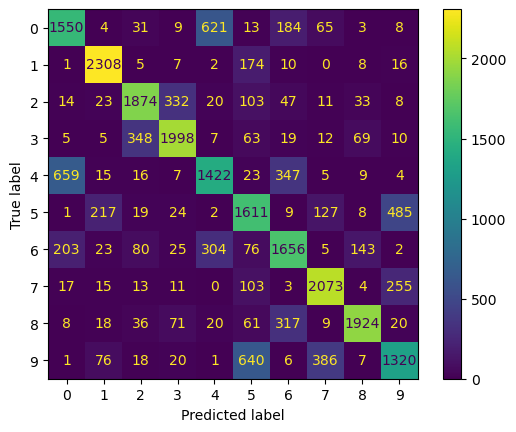

In [70]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
print(accuracy_score(y_test, predictions))

### kNN-Classifier

0.6718

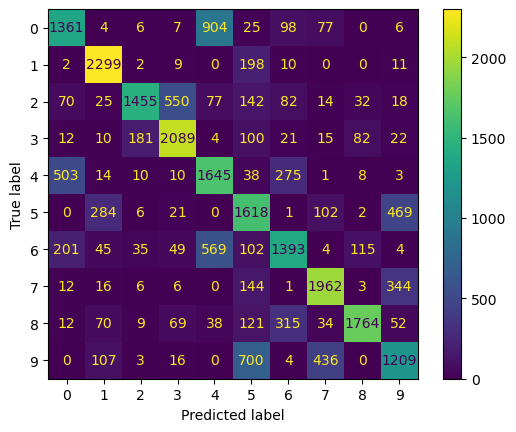

In [71]:
clf = KNeighborsClassifier(n_neighbors = 50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();
accuracy_score(y_test, predictions)